### Importing libraries and defining plot_color function. (Make sure to run this!)

In [ ]:
# Standard data science libraries
import numpy as np
import pandas as pd
# Used for our 2D plots
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import figure
from PIL import Image
# Used for 3D plotting
import plotly.express as px

# Helper function to plot a color.
def plot_color(red, green, blue, ax=None):
    # Confirm input is in a vaid range.
    if (not (0 <= red and red <= 255 and 0 <= green and green <= 255 and 0 <= blue and blue <= 255)):
      print("Your colors must be between 0 and 255!")
    else:
      # Create the plot if not provided.
      if ax == None:
        fig, ax = plt.subplots()
      # Create a rectangle of a certain color.
      your_color = (red/255, green/255, blue/255)
      rect = patches.Rectangle((0, 0), 100, 100, edgecolor=your_color, facecolor=your_color)
      ax.add_patch(rect)
      # Plot the rectangle with a title
      ax.set_title(f"Color RGB({red}, {green}, {blue})")
      ax.set_xlim((0,100))
      ax.set_ylim((0,100))
      ax.axis('off')
      if ax == None:
        plt.show()

# Section 1: Try plotting some of your own colors!

Just from the combination of these 3 components - red, blue, and green - on a scale from 0 to 255, we can create over 16 million different colors (256^3). Try moving around the sliders below to create a color you like.

You can also open a new code cell and use the function plot_color(red, green, blue) substituting each color name with a number between 0 and 255.

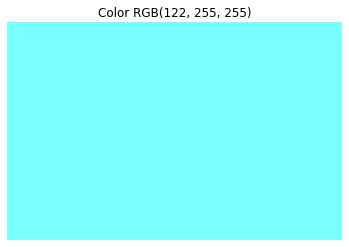

In [ ]:
red = 122 #@param {type:"slider", min:0, max:255, step:1}
green = 255 #@param {type:"slider", min:0, max:255, step:1}
blue = 255 #@param {type:"slider", min:0, max:255, step:1}
plot_color(red, green, blue)

# Section 2: 2D Color Spaces

We can think of our color as a point existing in 3 dimensions (one dimension for each primary color). However, in order to understand 3D points, let's first consider points in 2 dimensions. Below, you will select a color in (r,g,b) and we visualize the components of that point (green,blue), (red,green), and (red,blue). The gradient background represents all possible colors that can be created from each of the two components and the white point shows where our color exists in the dimension space!

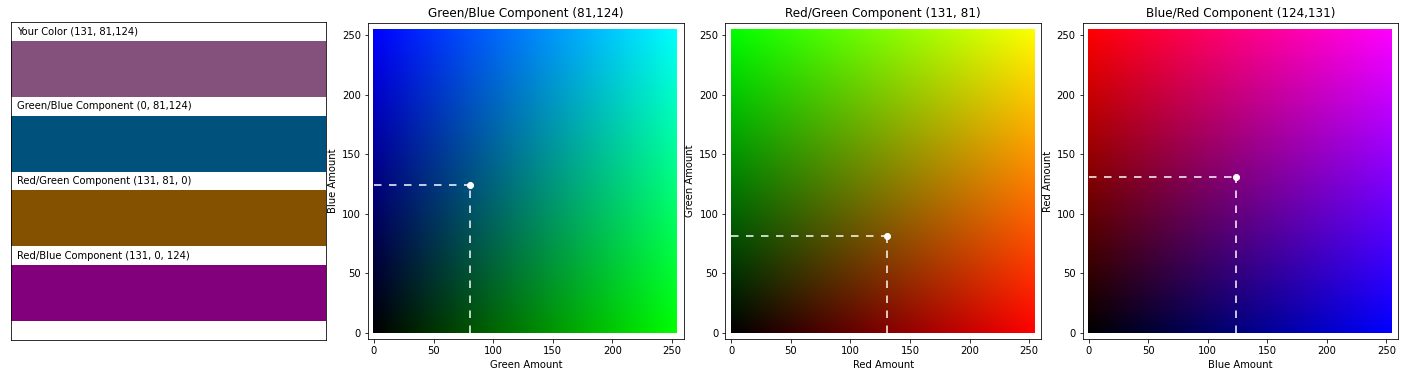

In [ ]:
red = 131 #@param {type:"slider", min:0, max:255, step:1}
green = 81 #@param {type:"slider", min:0, max:255, step:1}
blue = 124 #@param {type:"slider", min:0, max:255, step:1}

# Create figure and axes
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
fig.tight_layout()

# Create graphic that shows each of the color components
info_ax = axs[0]
# Add full color patch
rect = patches.Rectangle((0, 195), 255, 45,
                         linewidth=1, 
                         facecolor=(red/255, green/255, blue/255))
info_ax.add_patch(rect)
info_ax.text(5, 245, f"Your Color ({red}, {green},{blue})")
# Green/Blue Component
rect = patches.Rectangle((0, 135), 255, 45,
                         linewidth=1, 
                         facecolor=(0, green/255, blue/255))
info_ax.add_patch(rect)
info_ax.text(5, 185, f"Green/Blue Component (0, {green},{blue})")
# Red/Green Component
rect = patches.Rectangle((0, 75), 255, 45,
                         linewidth=1, 
                         facecolor=(red/255, green/255, 0))
info_ax.add_patch(rect)
info_ax.text(5, 125, f"Red/Green Component ({red}, {green}, 0)")
# Red/Blue Component
rect = patches.Rectangle((0, 15), 255, 45,
                         linewidth=1, 
                         facecolor=(red/255, 0, blue/255))
info_ax.add_patch(rect)
info_ax.text(5, 65, f"Red/Blue Component ({red}, 0, {blue})")

# Hide axis on this ection.
info_ax.set_xlim((0, 255))
info_ax.set_ylim((0, 255))
info_ax.get_xaxis().set_visible(False)
info_ax.get_yaxis().set_visible(False)

# Helper to create gradient
def create_gradient(ax, x_color, y_color, title, x_label, y_label, gradient_func):
  # Create gradient background.
  im = Image.new('RGB', (255, 255))
  ld = im.load()
  for x in range(255):
    for y in range(255):
      ld[x, y] = gradient_func(x,y)

  ax.imshow(im)

  # Add point to color space.
  color = (1, 1, 1)
  ax.scatter(x_color, y_color, color='white')
  # Add vertical/horizontal dotted lines.
  ax.annotate("", xy = (x_color, y_color))
  ax.plot([x_color, x_color], [0, y_color], dashes=(5.0, 5.0), color='white')
  ax.plot([0, x_color], [y_color, y_color], dashes=(5.0, 5.0), color='white')

  # Set title and axis.
  ax.set_xlim((-5, 260))
  ax.set_ylim((-5, 260))
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

# Create
create_gradient(axs[1], green, blue, f"Green/Blue Component ({green},{blue})", "Green Amount", "Blue Amount", lambda x, y: (0, x, y))
create_gradient(axs[2], red, green, f"Red/Green Component ({red}, {green})", "Red Amount", "Green Amount", lambda x, y: (x, y, 0))
create_gradient(axs[3], blue, red, f"Blue/Red Component ({blue},{red})","Blue Amount", "Red Amount", lambda y, x: (x, 0, y))
plt.show()